In [1]:
import numpy as np
import pandas as pd
import proplot as plt
# import matplotlib.pyplot as _plt
import winglets as wl

from winglets.utils import get_base_sections, get_base_winglet_parametrization
from winglets.conventions import WingletParameters

In [2]:
ALTITUDE = 11000
MACH = 0.75
CL = 0.45

In [3]:
def build_parameters(cant_angle=45):
    
    _parameters = get_base_winglet_parametrization()
    
    _parameters[WingletParameters.ANGLE_CANT.value] = cant_angle
    
    return _parameters

In [4]:
sections = get_base_sections()
cant_angles = np.linspace(start = 0, stop = 85, num = 20)
options = dict(marker = ".", lw=0.5, linestyle = "--", legend=False)

## Constant CL

### Base line

In [5]:
flying_wing = wl.FlyingWing(sections=sections, winglet_parameters=None)

flying_wing.create_wing_planform()

solver = wl.WingSolver(
    model=flying_wing, altitude=ALTITUDE, mach=MACH, design_cl=CL
)

problem = solver.solve_cl(cl=CL)

CDi0_cl = problem.CDi
Cm0_cl = problem.Cm

ALPHA = problem.op_point.alpha

### With winglet

In [ ]:
results = []
for angle in cant_angles:

    parameters = build_parameters(cant_angle=angle)

    flying_wing = wl.FlyingWing(sections=sections, winglet_parameters=parameters)

    flying_wing.create_wing_planform()
    flying_wing.create_winglet()

    solver = wl.WingSolver(
        model=flying_wing, altitude=ALTITUDE, mach=MACH, design_cl=CL
    )

    problem = solver.solve_cl(cl=CL)

    results.append(
        pd.Series(
            [angle, problem.CDi / CDi0_cl, problem.Cm / Cm0_cl, problem.op_point.alpha / ALPHA],
            index=["cant_angle", "CDi", "Cm", "alpha"],
        )
    )

results_cl = pd.DataFrame(results).set_index("cant_angle")
results_cl["E"] = 1.0 / results_cl["CDi"]

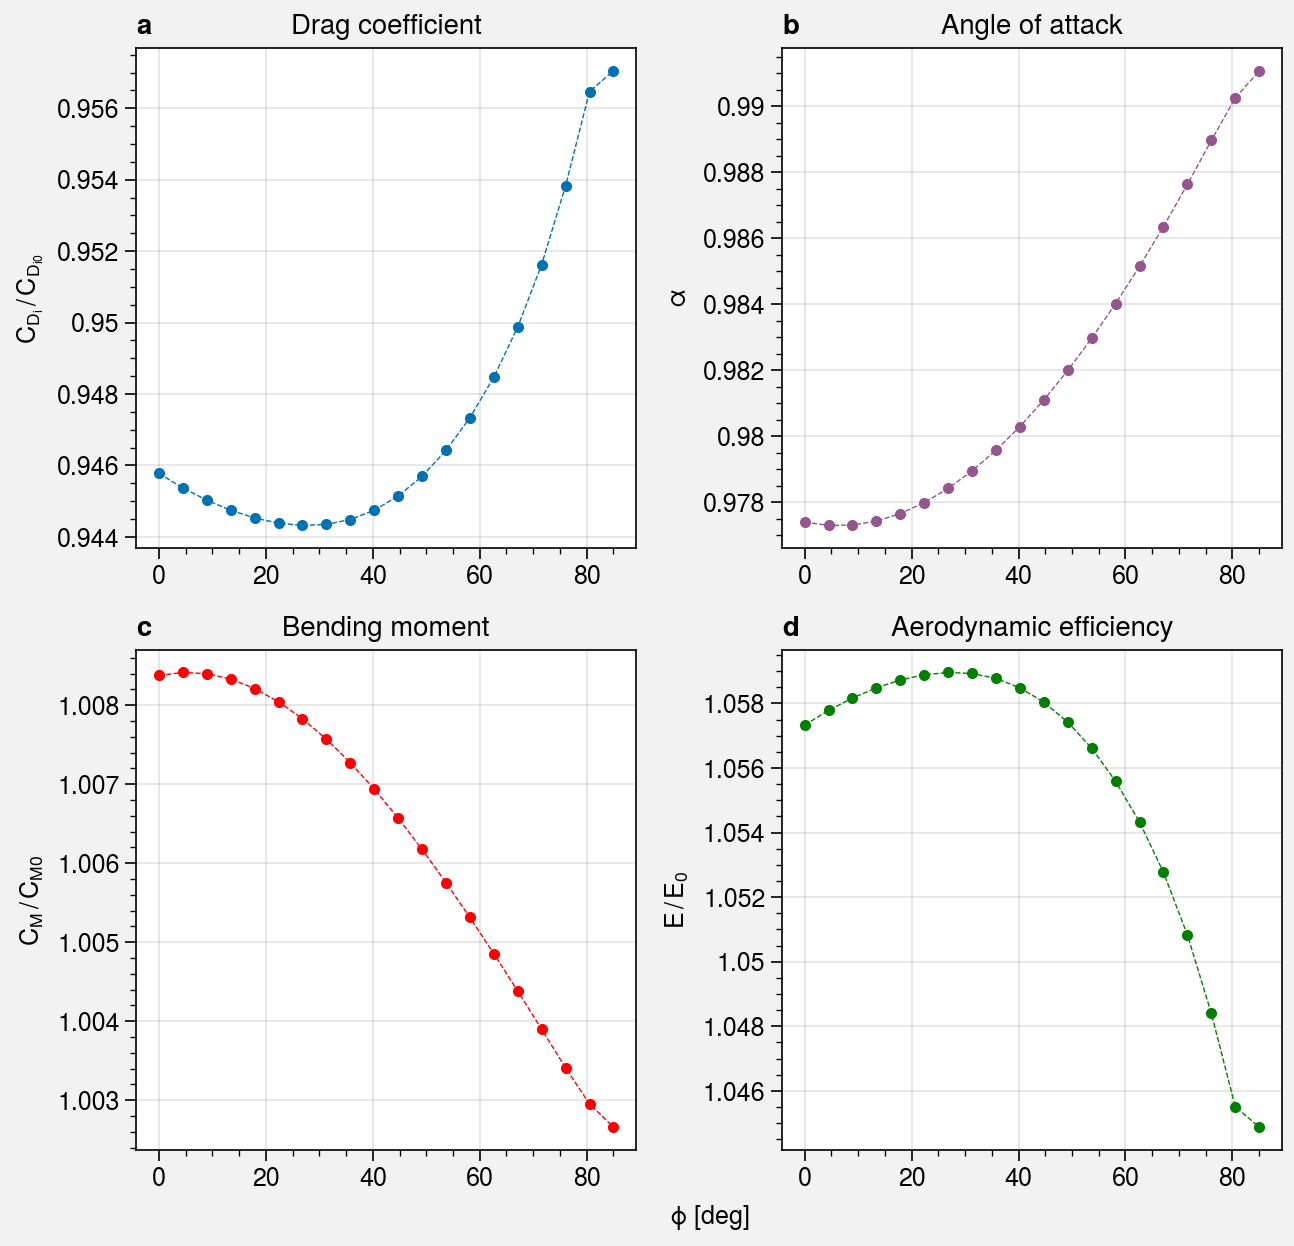

In [23]:
fig, axes = plt.subplots(ncols=2, nrows=2, sharey=False, sharex=True)

axes[0].plot(results_cl["CDi"], **options)
axes[0].format(
    abc=True, title="Drag coefficient", ylabel="$C_{D_{i}} \, / \, C_{D_{i0}}$"
)

axes[2].plot(results_cl["Cm"], **options, c="r")
axes[2].format(
    abc=True,
    title="Bending moment",
    ylabel="$C_{M} \, / \, C_{M0}$",
    xlabel="$\\phi$ [deg]",
)

axes[1].plot(results_cl["alpha"], **options, c = "purple")
axes[1].format(abc=True, title="Angle of attack", ylabel="$\\alpha$")

axes[3].plot(results_cl["E"], **options, c="green")
axes[3].format(
    abc=True, title="Aerodynamic efficiency", ylabel="$E \, / \, E_0$", xlabel="$\\phi$ [deg]"
)

fig.save("drag_bending_constant_cl.png", dpi = 300, transparent=True, bbox_inches="tight")

## Constant Angle of Attack

In [8]:
flying_wing = wl.FlyingWing(sections=sections, winglet_parameters=None)

flying_wing.create_wing_planform()

solver = wl.WingSolver(
    model=flying_wing, altitude=ALTITUDE, mach=MACH, design_cl=CL
)

problem = solver.solve_alpha(alpha=ALPHA)

CDi0_alpha = problem.CDi
Cm0_alpha = problem.Cm
CL0_alpha = problem.CL

In [9]:
results = []
for angle in cant_angles:

    parameters = build_parameters(cant_angle=angle)

    flying_wing = wl.FlyingWing(sections=sections, winglet_parameters=parameters)

    flying_wing.create_wing_planform()
    flying_wing.create_winglet()

    solver = wl.WingSolver(
        model=flying_wing, altitude=ALTITUDE, mach=MACH, design_cl=CL
    )

    problem = solver.solve_alpha(alpha=ALPHA)

    results.append(
        pd.Series(
            [angle, problem.CDi / CDi0_alpha, problem.Cm / Cm0_alpha, problem.CL / CL0_alpha],
            index=["cant_angle", "CDi", "Cm", "CL"],
        )
    )

In [10]:
results_alpha = pd.DataFrame(results).set_index("cant_angle")

# Compute aerodynamic efficiency
results_alpha["E"] = results_alpha["CL"] / results_alpha["CDi"]

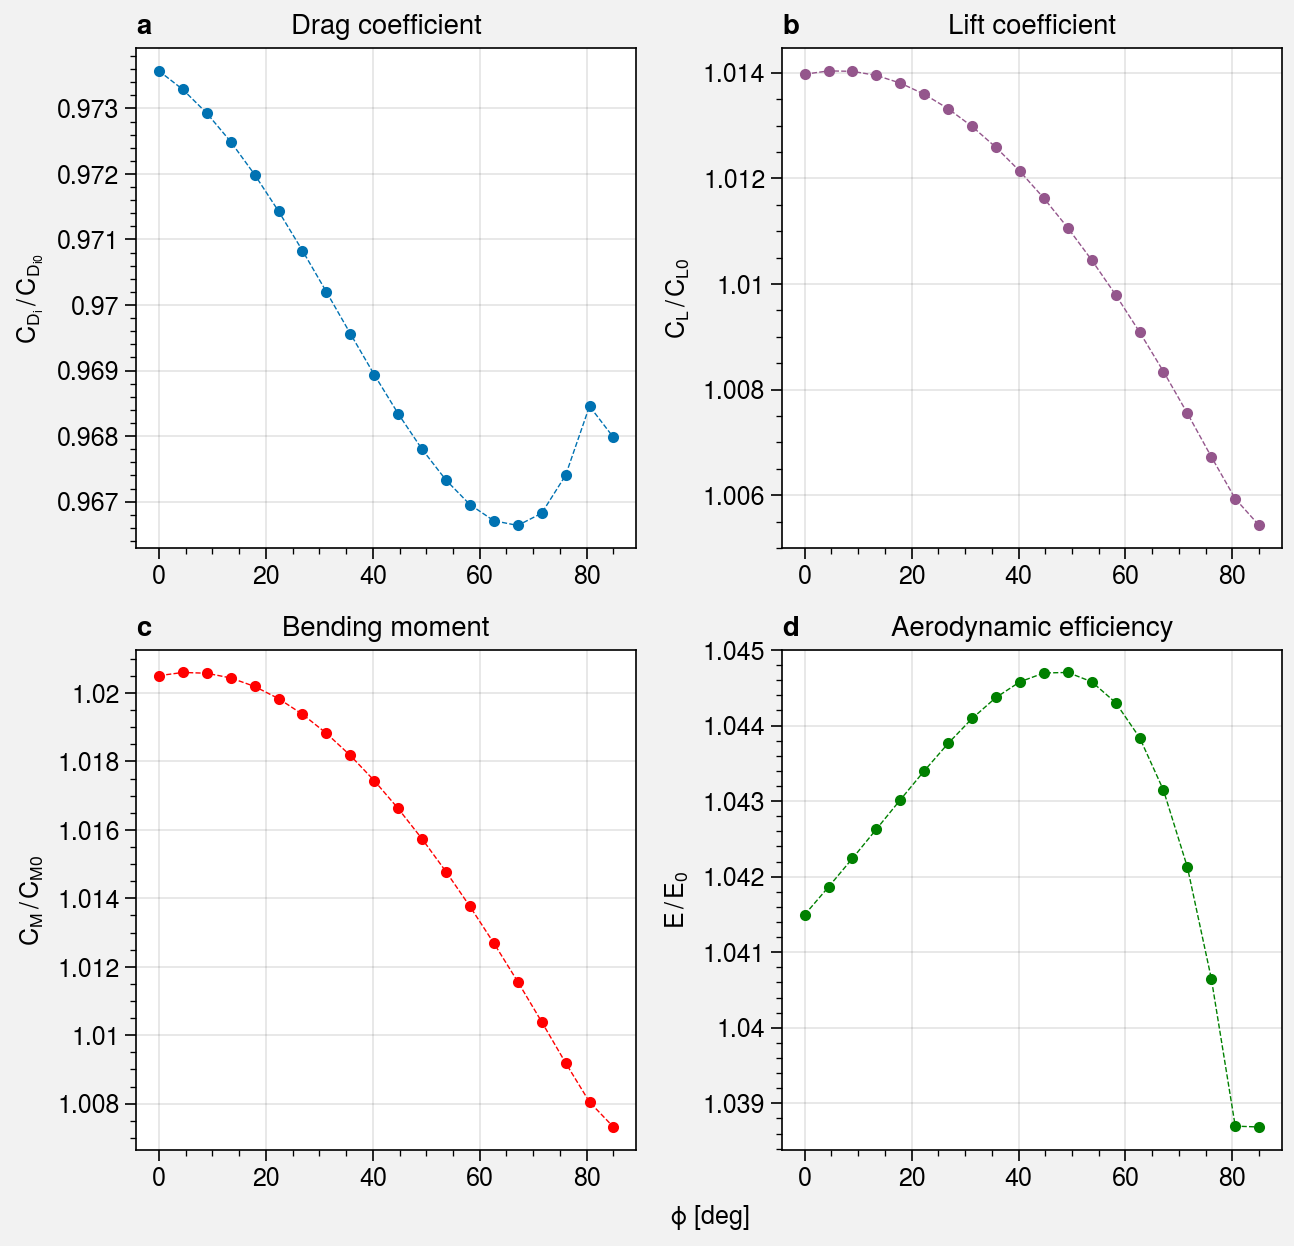

In [18]:
fig, axes = plt.subplots(ncols=2, nrows=2, sharey=False, sharex=True)

axes[0].plot(results_alpha["CDi"], **options)
axes[0].format(
    abc=True, title="Drag coefficient", ylabel="$C_{D_{i}} \, / \, C_{D_{i0}}$"
)

axes[2].plot(results_alpha["Cm"], **options, c="r")
axes[2].format(
    abc=True,
    title="Bending moment",
    ylabel="$C_{M} \, / \, C_{M0}$",
    xlabel="$\\phi$ [deg]",
)

axes[1].plot(results_alpha["CL"], **options, c = "purple")
axes[1].format(abc=True, title="Lift coefficient", ylabel="$C_{L} \, / \, C_{L0}$")

axes[3].plot(results_alpha["E"], **options, c="green")
axes[3].format(
    abc=True, title="Aerodynamic efficiency", ylabel="$E \, / \, E_0$", xlabel="$\\phi$ [deg]"
)

fig.save("drag_bending_constant_alpha.png", dpi = 300, transparent=True, bbox_inches="tight")